This notebook was generated by copying code from: https://notebook.community/cgranade/qutip-notebooks/examples/example-rabi-oscillations
<br> 
<table>
    <tr>
        <th> Modified </th>
        <th> By </th>
        <th> Reason </th>
    </tr>
    <tr>
        <td> 21-Jan-25</td>
        <td> CBL </td>
        <td> Original </td>
    </tr>
</table>
<hr> 

<H1> QuTiP example: Vacuum Rabi oscillations in the Jaynes-Cummings model </H1>
<br> 
J.R. Johansson and P.D. Nation
<br> 
This ipython notebook demonstrates how to simulate the quantum vacuum rabi oscillations in the Jaynes-Cumming model, using QuTiP: The Quantum Toolbox in Python.
<hr> 
<a href = "https://qutip.readthedocs.io/en/qutip-5.0.x/index.html"> qutip page</a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *


<H1> Introduction </H1>

The Jaynes-Cumming model is the simplest possible model of quantum mechanical light-matter interaction, describing a single two-level atom interacting with a single electromagnetic cavity mode. The Hamiltonian for this system is (in dipole interaction form)
<br> 
$H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$
<br> 
or with the rotating-wave approximation
<br>
$H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$
<br> 
where $\omega_c$ and $\omega_a$ are the frequencies of the cavity and atom, respectively, and $g$ is the interaction strength.
<br> 
CBL add: <br> 
$ {I, \sigma_x, \sigma_y, \sigma_z} $ are the standard <a href="https://en.wikipedia.org/wiki/Pauli_matrices"> Pauli operators.  </a>
<br> 
Used with the Jaynes-Cummings Hamiltonian the following are defined. <br> 
$\sigma_+ = (\sigma_x + i \sigma_y)/2 $ <br> 
$\sigma_- = (\sigma_x - i \sigma_y)/2$ <br> 
<H1> Problem parameters </H1>
Here we use units where $\hbar = 1$:


In [3]:
wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100)

<H1> Setup the operators, the Hamiltonian and initial state </H1>
CBL add<br> 
$H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$
<br> 
or with the rotating-wave approximation
<br>
$H_{\rm RWA} = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g(a^\dagger\sigma_- + a\sigma_+)$
<br> 
use_rwa set above -- 
<a href = "https://en.wikipedia.org/wiki/Rotating-wave_approximation" > Rotating Wave Aproximation. </a>

In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

<H1> Create a list of collapse operators that describe the dissipation </H1>

In [10]:
c_op_list = []
# calculate cavity rate, n_th is effective cavity temperature in frequency units. 
rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())
    
# same for atom, temperature not pertinant. 
rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)


<H1> Evolve the system </H1>

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$ and $\sigma_+\sigma_-$ are returned by the solver by passing the list [a.dag()*a, sm.dag()*sm] as the fifth argument to the solver.


In [11]:
# CBL, warning here. something about qutip 5.3, currently at qutip 5.1.1, 21-Jan-25
# mesolve is internal to qutip. Looking at the terminal, I see that solver_base.py does not exist in the version of 
# QuTiP I installed. I use pip3 install qutip which may not be up to date. 
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])


<H1>Visualize the results</H1>

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the mesolve above). We can clearly see how energy is being coherently transferred back and forth between the cavity and the atom.


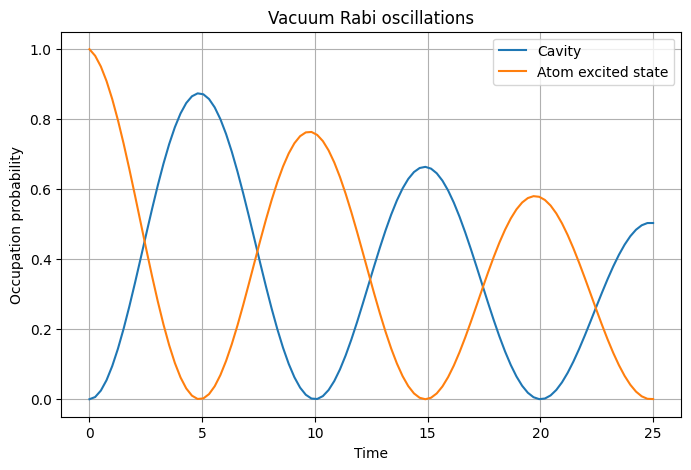

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');
ax.grid()